In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = sns.load_dataset('titanic')

# Display first few rows
df.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [12]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


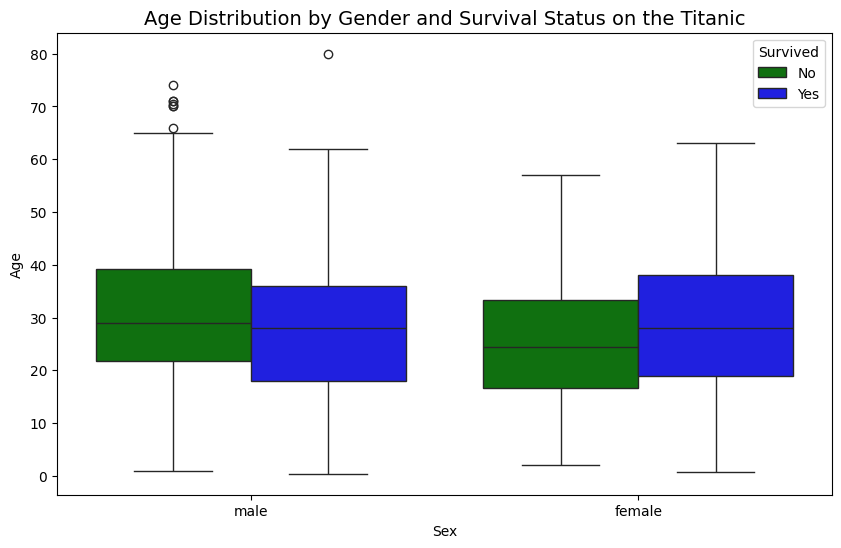

In [13]:
# Define highly contrasting colors
custom_palette = {0: 'green', 1: 'blue'} # 0 Not Survived (Red),1 Survived (Blue)

# Create the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='sex', y='age', hue='survived', data=df, palette=custom_palette)

# Fix legend labels properly
legend_labels = ['No', 'Yes']
handles, _ = plt.gca().get_legend_handles_labels()
plt.legend (handles, legend_labels, title='Survived')

#Add title and labels
plt.title('Age Distribution by Gender and Survival Status on the Titanic', fontsize=14)
plt.xlabel('Sex')
plt.ylabel('Age')

# Show plot
plt.show()

## Observations

1. **Sepal Length**  
   - Spread out between **4.5 and 8.0**  
   - Multiple peaks around **5.0**, **5.5**, and **6.5** (slightly **multimodal**)

2. **Sepal Width**  
   - Most values are around **3.0**  
   - Distribution is slightly **left-skewed**

3. **Petal Length**  
   - Shows a **bimodal distribution**  
   - Many short petals around **1.5**, and a separate cluster between **4.0 and 5.0**

4. **Petal Width**  
   - Also **bimodal**  
   - Large peak around **0.2**, with another spread near **1.5**

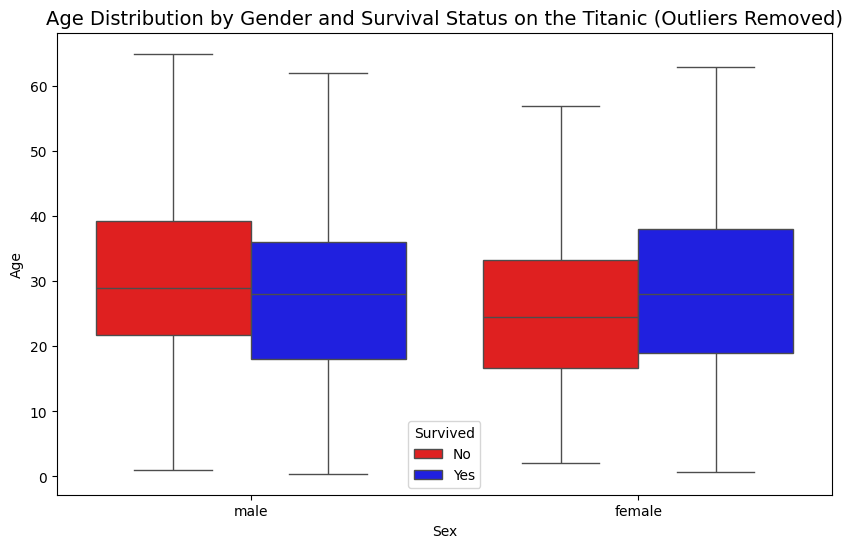

In [14]:
# Define distinct colors for survival status
custom_palette = {0: 'red', 1: 'blue'} # 0 Did not survive, 1 Survived

#Create the box plot without outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x='sex', y='age', hue='survived', data=df,palette = custom_palette, showfliers=False)

#Fix legend labels properly
legend_labels = ['No', 'Yes']
handles, _  = plt.gca().get_legend_handles_labels()
plt.legend (handles, legend_labels, title='Survived')

#Add title and labels
plt.title('Age Distribution by Gender and Survival Status on the Titanic (Outliers Removed)', fontsize=14)
plt.xlabel('Sex')
plt.ylabel('Age')

# Show plot
plt.show()

## Observations

1. **Females** still show **higher survival rates** than males.
2. The **number of survivors** is higher than that of non-survivors.
3. Among **males**, **non-survivors tend to be older** than survivors.
4. The **median age of females** is higher than that of survivors.
5. The **age distributions** are more balanced and cleaner, with **fewer outliers**.

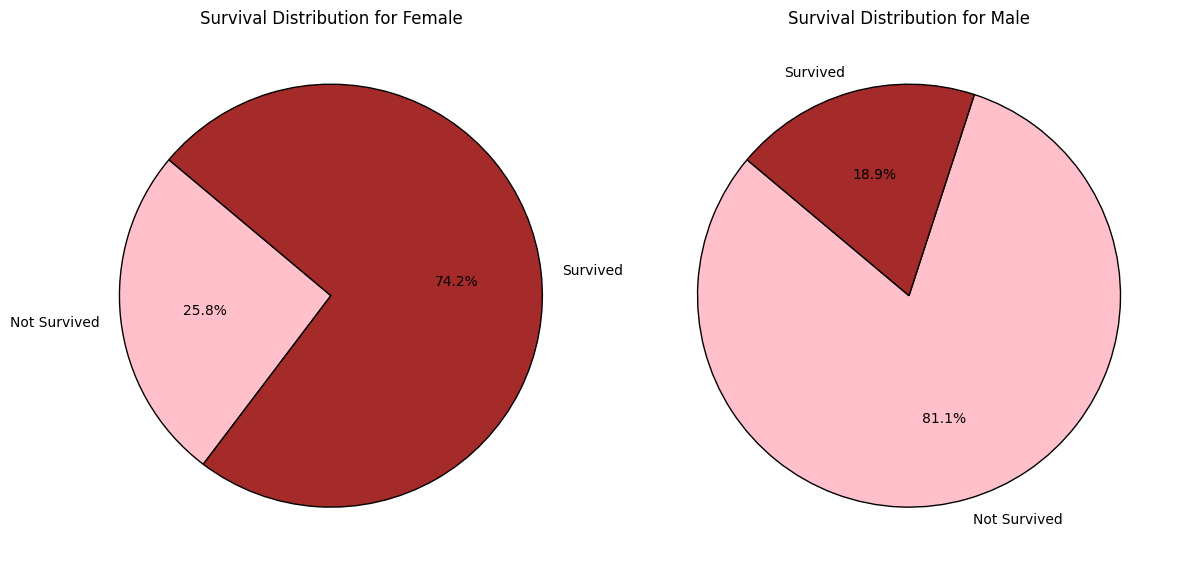

In [15]:
# Count of survival status grouped by gender
survival_counts = df.groupby(['sex', 'survived']).size().unstack()

# Define colors for better visualization
colors = ['pink', 'brown'] # Red Not survived, Blue Survived

# Create the pie charts
fig, axes = plt.subplots (1, 2, figsize=(12, 6))

# Show plot
for i, gender in enumerate (survival_counts.index):
    axes[i].pie (survival_counts.loc [gender], labels=['Not Survived','Survived'], autopct='%1.1f%%', colors=colors, startangle=140,wedgeprops={'edgecolor': 'black'})
    axes[i].set_title(f'Survival Distribution for {gender.capitalize()}')

plt.tight_layout()
plt.show()

## Observations

1. **74.2% of females** survived, showing a **high survival rate**.
2. Only **18.9% of males** survived, with **81.1% not surviving**.
3. This clearly shows that **females had a much higher chance of survival** compared to males on the Titanic.
